In [1]:
# Scikit-learn (formerly scikits.learn and also known as sklearn) is a free
# software machine learning library for the Python programming language.
# It features various classification, regression and clustering algorithms,
# and is designed to interoperate with the Python numerical and scientific
# libraries NumPy and SciPy. (from wiki)

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance

# common visualization module
from matplotlib import pyplot as plt
#!pip install plotly
import plotly.express as px
#!pip install seaborn
import seaborn as sns
sns.set()

# numeric library
import numpy as np

import os
import pandas as pd
from time import time as timer
import tarfile

#!pip install tensorflow
import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

#!pip install dtreeviz==1.4.0
from dtreeviz.trees import dtreeviz # remember to load the package

2023-09-27 00:21:39.155554: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
! head data/AmesHousing.csv

Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,0526301100,020,RL,141,31770,Pave,NA,IR1,Lvl,AllP

In [2]:
path = 'data/AmesHousing.csv'

# Read the dataset into a Pandas DataFrame, treating certain values as NaN
df = pd.read_csv(path, na_values=('NaN', ''), keep_default_na=False,  )
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NA,IR1,Lvl,...,0,NA,GdPrv,NA,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NA,IR1,Low,...,0,NA,MnPrv,NA,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2006,WD,Normal,170000


In [3]:
# Iterate through all columns and count unique values
unique_counts = {}
for column in df.columns:
    unique_counts[column] = df[column].nunique()

# Print the unique value counts for all columns
for column, count in unique_counts.items():
    print(f"Column '{column}' has {count} unique values.")


Column 'Order' has 2930 unique values.
Column 'PID' has 2930 unique values.
Column 'MS SubClass' has 16 unique values.
Column 'MS Zoning' has 7 unique values.
Column 'Lot Frontage' has 128 unique values.
Column 'Lot Area' has 1960 unique values.
Column 'Street' has 2 unique values.
Column 'Alley' has 3 unique values.
Column 'Lot Shape' has 4 unique values.
Column 'Land Contour' has 4 unique values.
Column 'Utilities' has 3 unique values.
Column 'Lot Config' has 5 unique values.
Column 'Land Slope' has 3 unique values.
Column 'Neighborhood' has 28 unique values.
Column 'Condition 1' has 9 unique values.
Column 'Condition 2' has 8 unique values.
Column 'Bldg Type' has 5 unique values.
Column 'House Style' has 8 unique values.
Column 'Overall Qual' has 10 unique values.
Column 'Overall Cond' has 9 unique values.
Column 'Year Built' has 118 unique values.
Column 'Year Remod/Add' has 61 unique values.
Column 'Roof Style' has 6 unique values.
Column 'Roof Matl' has 8 unique values.
Column 'E

In [4]:
# Define a function called 'house_prices_dataset' with optional parameters
def house_prices_dataset(return_df=False, return_df_xy=False, price_max=400000, area_max=40000):
  # Specify the path to the dataset file
  path = 'data/AmesHousing.csv'

  # Read the dataset into a Pandas DataFrame, treating certain values as NaN
  df = pd.read_csv(path, na_values=('NaN', ''), keep_default_na=False,  )

  # Create a dictionary to rename DataFrame columns (removing spaces and slashes)
  rename_dict = {k:k.replace(' ', '').replace('/', '') for k in df.keys()}
  df.rename(columns=rename_dict, inplace=True)

  # Define a list of useful fields (features) and the target field (SalePrice)
  useful_fields = ['LotArea',
                  'Utilities', 'OverallQual', 'OverallCond',
                  'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond',
                  'HeatingQC', 'CentralAir', 'Electrical',
                  '1stFlrSF', '2ndFlrSF','GrLivArea',
                  'FullBath', 'HalfBath',
                  'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
                  'Functional','PoolArea',
                  'YrSold', 'MoSold'
                  ]
  target_field = 'SalePrice'

  # Remove rows with missing values in the specified columns
  df.dropna(axis=0, subset=useful_fields+[target_field], inplace=True)

  # Create a dictionary for mapping categorical variables to numerical values
  cleanup_nums = {'Street':      {'Grvl': 0, 'Pave': 1},
                  'LotFrontage': {'NA':0},
                  'Alley':       {'NA':0, 'Grvl': 1, 'Pave': 2},
                  'LotShape':    {'IR3':0, 'IR2': 1, 'IR1': 2, 'Reg':3},
                  'Utilities':   {'ELO':0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3},
                  'LandSlope':   {'Sev':0, 'Mod': 1, 'Gtl': 3},
                  'ExterQual':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'ExterCond':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'BsmtQual':    {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'BsmtCond':    {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'BsmtExposure':{'NA':0, 'No':1, 'Mn': 2, 'Av': 3, 'Gd': 4},
                  'BsmtFinType1':{'NA':0, 'Unf':1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ':6},
                  'BsmtFinType2':{'NA':0, 'Unf':1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ':6},
                  'HeatingQC':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'CentralAir':  {'N':0, 'Y': 1},
                  'Electrical':  {'':0, 'NA':0, 'Mix':1, 'FuseP':2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
                  'KitchenQual': {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'Functional':  {'Sal':0, 'Sev':1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2':5, 'Min1':6, 'Typ':7},
                  'FireplaceQu': {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'PoolQC':      {'NA':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'Fence':       {'NA':0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv':4},
                  }

  # Create a copy of the DataFrame containing only the useful features
  df_X = df[useful_fields].copy()
  # Replace categorical values with their corresponding numerical values
  df_X.replace(cleanup_nums, inplace=True) 
  # Create a copy of the target variable (SalePrice)
  df_Y = df[target_field].copy()

  # Convert the DataFrame to NumPy arrays of float32 data type
  x = df_X.to_numpy().astype(np.float32)
  y = df_Y.to_numpy().astype(np.float32)

  # Filter the data based on price and area limits, if specified
  if price_max>0:
    idxs = y<price_max
    x = x[idxs]
    y = y[idxs]

  if area_max>0:
    idxs = x[:,0]<area_max
    x = x[idxs]
    y = y[idxs]

  # Return data in various formats based on function arguments
  return (x, y, df) if return_df else ((x, y, (df_X, df_Y)) if return_df_xy else (x,y))

In [5]:
x, y, df = house_prices_dataset(return_df=True)
print(x.shape, y.shape)
df

(2847, 24) (2847,)


,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NA,IR1,Lvl,...,0,NA,GdPrv,NA,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NA,IR1,Low,...,0,NA,MnPrv,NA,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2006,WD,Normal,170000


In [7]:
# 1. Perform the train/test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2277, 24), (570, 24), (2277,), (570,))

In [16]:
# 2. Train the model

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

w, w0 = reg.coef_, reg.intercept_
print(w, w0)

[ 1.5718842e+00  2.1218160e+04  1.3240777e+04  4.0991104e+03
  4.5329642e+02  4.5687878e+01  1.0972733e+04 -1.4993818e+03
  2.4708291e+03 -8.4375751e+02 -4.9229565e+02  5.5848572e+01
  3.2218624e+01  2.2128305e+01 -1.9047751e+03 -2.0439727e+03
 -4.9090469e+03 -1.9251754e+04  9.2657236e+03  4.0100739e+01
  4.8907891e+03  2.2853477e+01 -4.8863818e+02  1.4293448e+02] -163856.66


In [17]:
# Save predictions in variables of their own

y_pred_train = reg.predict(x_train)
y_pred_test = reg.predict(x_test)

y_pred_train.shape, y_pred_test.shape, x_train.shape, x_test.shape

((2277,), (570,), (2277, 24), (570, 24))

In [13]:
# 3. Evaluate MSE, MAD, and R2 on train and test datasets

# mse
print('train mse =', np.std(y_train - y_pred_train))
print('test mse =', np.std(y_test - y_pred_test))

# mse
print('train mse =', np.median(np.abs((y_train - y_pred_train))))
print('test mse =', np.median(np.abs((y_test - y_pred_test))))

# R2
print('train R2 =', reg.score(x_train, y_train))
print('test R2 =', reg.score(x_test, y_test))

train mse = 26644.646
test mse = 23991.53
train mse = 13523.031
test mse = 15020.3125
train R2 = 0.8389199468827494
test R2 = 0.8592981527433595


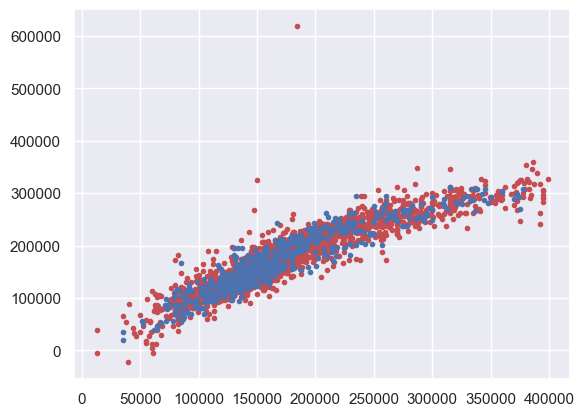

In [15]:
# 4. Plot y vs. predicted y for train and test datasets

plt.plot(y_train, y_pred_train, 'r.', label = "train")
plt.plot(y_test, y_pred_test, 'b.', label = 'test')